In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import random 
from plotnine import *
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
import pickle

In [2]:
import pandas as pd

# Definir los vectores en Python
C1 = [1, 1, 1, 0, 0, 0]
C2 = [0, 1, 1, 1, 0, 0]
C3 = [0, 0, 1, 1, 1, 0]
C4 = [0, 0, 0, 0, 1, 1]

# Crear el dataframe
aff_df = pd.DataFrame({'C1': C1, 'C2': C2, 'C3': C3, 'C4': C4})

# Establecer los nombres de fila
aff_df.index = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6']
aff=aff_df.to_numpy()
# Mostrar el dataframe
print(aff_df)
# se cambio a numpy al parecer igraph en python trabaja mejor con numpy que con pandas 

    C1  C2  C3  C4
S1   1   0   0   0
S2   1   1   0   0
S3   1   1   1   0
S4   0   1   1   0
S5   0   0   1   1
S6   0   0   0   1


In [3]:
g = ig.Graph.Biadjacency(aff)
g.vs['name']=['S1', 'S2', 'S3', 'S4', 'S5', 'S6','C1', 'C2', 'C3', 'C4']
# al parecer se agregan primero las filas y posteriormente las columnas 

In [4]:
plt_x = [2] * 6 + [4] * 4
plt_y = list(range(7, 1, -1)) + list(range(6, 2, -1))
layout = [(x, y) for x, y in zip(plt_x, plt_y)]
# layout adaptado con chat gpt

shapes = ['circle', 'square']
colors = ['blue', 'red']
# se crea una lista de formas

shape=[]
color=[]

# Assigning shapes and colors to vertices
for type in (g.vs['type']):
    shape.append(shapes[type]) # si es un elemento de las filas es 0 y por el contrario es 1
    color.append(colors[type]) # si es un elemento de las filas es 0 y por el contrario es 1

# se agrega el atrivuto a los vertices
g.vs['color']=color
g.vs['shape']= shape


In [5]:
print(ig.GraphSummary(g))

IGRAPH UN-T 10 11 -- 
+ attr: color (v), name (v), shape (v), type (v)


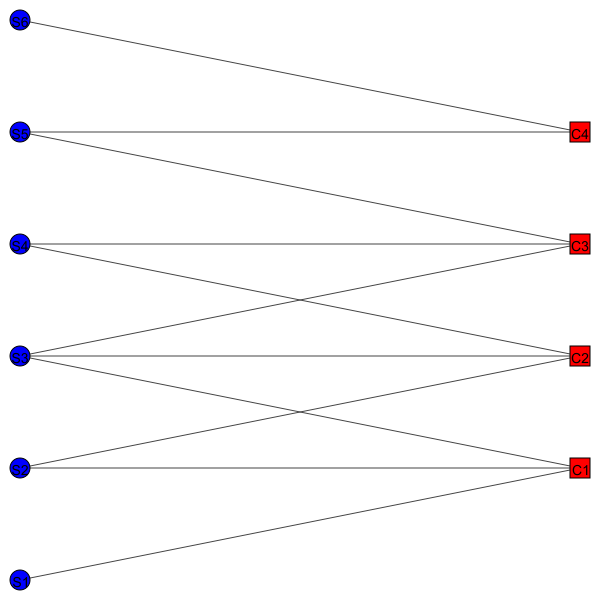

In [6]:
ig.plot(g,vertex_label=g.vs['name'],layout=layout)

In [7]:
for es in g.es:
    print(str(aff_df.index[es.tuple[0]]) + ' ~ ' + str(aff_df.columns[es.tuple[1]-aff_df.shape[0]]))
# como los vertices se guardan como una lista en la que primero van las filas y luego las columnas
# para ver cuales son los vertices y vemos su posicion en la df original

S1 ~ C1
S2 ~ C1
S2 ~ C2
S3 ~ C1
S3 ~ C2
S3 ~ C3
S4 ~ C2
S4 ~ C3
S5 ~ C3
S5 ~ C4
S6 ~ C4


In [8]:
g.get_biadjacency()

([[1, 0, 0, 0],
  [1, 1, 0, 0],
  [1, 1, 1, 0],
  [0, 1, 1, 0],
  [0, 0, 1, 1],
  [0, 0, 0, 1]],
 [0, 1, 2, 3, 4, 5],
 [6, 7, 8, 9])

In [9]:
g.vs['type']

[False, False, False, False, False, False, True, True, True, True]

In [10]:
g.vs['name']

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'C1', 'C2', 'C3', 'C4']

In [11]:
import pandas as pd

# Definir los datos
data = [['S1', 'C1'],
       ['S2', 'C1'],
       ['S2', 'C2'],
       ['S3', 'C1'],
       ['S3', 'C2'],
       ['S3', 'C3'],
       ['S4', 'C2'],
       ['S4', 'C3'],
       ['S5', 'C3'],
       ['S5', 'C4'],
       ['S6', 'C4']]
# Crear el DataFrame
df = pd.DataFrame(data)

In [12]:
# Creación del DataFrame para la primera columna (S)
S = pd.DataFrame((df[0].unique(),  # Obtener valores únicos de la primera columna
                  range(len(df[0].unique()))),  # Generar identificadores únicos
                 index=['Columna 1', 'Identificador']).T  # Transponer para obtener un DataFrame

# Creación del DataFrame para la segunda columna (C)
C = pd.DataFrame((df[1].unique(),  # Obtener valores únicos de la segunda columna
                  (np.full(len(df[1].unique()), len(df[0].unique())) + range(len(df[1].unique())))),  # Generar identificadores únicos
                 index=['Columna 2', 'Identificador']).T  # Transponer para obtener un DataFrame


In [13]:
(np.full(len(df[1].unique()), len(df[0].unique())) + range(len(df[1].unique())))

array([6, 7, 8, 9])

In [14]:
range(len(df[0].unique()))

range(0, 6)

In [15]:
np.full(len(df[1].unique()), len(df[0].unique())) # genera un arreglo con el numero de usuarios que hay 
# a ese numero le sumamos la secuencia generada por range

array([6, 6, 6, 6])

In [16]:
S

,Columna 1,Identificador
0,S1,0
1,S2,1
2,S3,2
3,S4,3
4,S5,4
5,S6,5


En este código:

- `S` y `C` son DataFrames creados para generar identificadores únicos incluso entre DataFrames.
- Los identificadores generados no superan el número de filas de ambos DataFrames.
- Estos DataFrames se utilizan para crear una lista de aristas que se pasará a un objeto tipo `ig.graph`.


In [17]:
Indentificados=df.merge(S,left_on=0,right_on="Columna 1",how="left").merge(C,left_on=1,right_on="Columna 2",how="left")
Indentificados

,0,1,Columna 1,Identificador_x,Columna 2,Identificador_y
0,S1,C1,S1,0,C1,6
1,S2,C1,S2,1,C1,6
2,S2,C2,S2,1,C2,7
3,S3,C1,S3,2,C1,6
4,S3,C2,S3,2,C2,7
5,S3,C3,S3,2,C3,8
6,S4,C2,S4,3,C2,7
7,S4,C3,S4,3,C3,8
8,S5,C3,S5,4,C3,8
9,S5,C4,S5,4,C4,9


In [18]:
Aristas=Indentificados[['Identificador_x', 'Identificador_y']]
Aristas

,Identificador_x,Identificador_y
0,0,6
1,1,6
2,1,7
3,2,6
4,2,7
5,2,8
6,3,7
7,3,8
8,4,8
9,4,9


types se crea para indicar de que tipo son los vertices que se le pasan a la red al momento de generarla

In [19]:
type=np.concatenate((np.full(len(df[0].unique()), True), np.full(len(df[0].unique()), False)))

In [20]:
name=np.concatenate((df[0].unique(),df[1].unique()))

In [21]:
# Assuming Aristas is your DataFrame
Aristas['Identificador_x'] = Aristas['Identificador_x'].astype(int)
Aristas['Identificador_y'] = Aristas['Identificador_y'].astype(int)


C:\Users\Pc\AppData\Local\Temp\ipykernel_5584\1100820221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Pc\AppData\Local\Temp\ipykernel_5584\1100820221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
Aristas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Identificador_x  11 non-null     int32
 1   Identificador_y  11 non-null     int32
dtypes: int32(2)
memory usage: 220.0 bytes


In [23]:
g = ig.Graph.DataFrame(Aristas, directed=False) 

In [24]:
g.vs['type']=type # para volverlo bipartita
g.vs['name']=name

In [25]:
g.is_bipartite()

True

In [26]:
shapes = ['circle', 'square']
colors = ['blue', 'red']
# se crea una lista de formas

shape=[]
color=[]

# Assigning shapes and colors to vertices
for type in (g.vs['type']):
    shape.append(shapes[int(type)]) # si es un elemento de las filas es 0 y por el contrario es 1
    color.append(colors[int(type)]) # si es un elemento de las filas es 0 y por el contrario es 1

# se agrega el atrivuto a los vertices
g.vs['color']=color
g.vs['shape']= shape


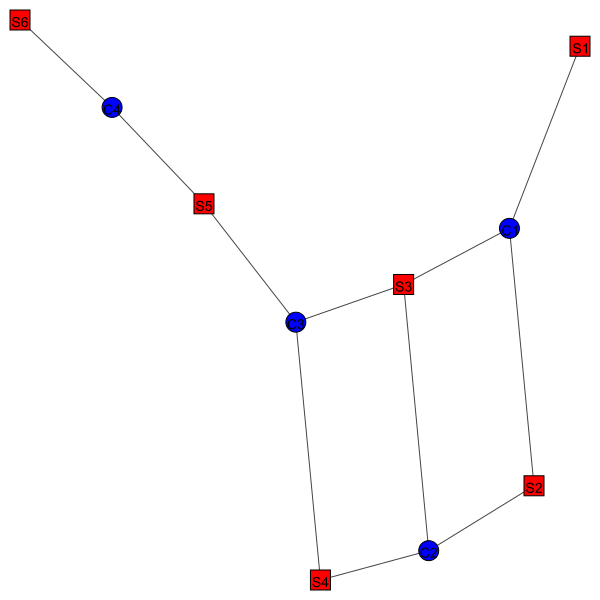

In [27]:
ig.plot(g,vertex_label=g.vs['name'])

In [28]:
bn_pr= g.bipartite_projection()

In [29]:
ig.summary(bn_pr[0])

IGRAPH UNWT 4 4 -- 
+ attr: color (v), name (v), shape (v), type (v), weight (e)


In [30]:
ig.summary(bn_pr[1])

IGRAPH UNWT 6 8 -- 
+ attr: color (v), name (v), shape (v), type (v), weight (e)


In [31]:
bn_pr[1].density()

0.5333333333333333

In [32]:
bn_students=bn_pr[1]
bn_class=bn_pr[0]

In [33]:
bn_students.density()

0.5333333333333333

In [34]:
print(bn_students.get_adjacency(attribute="weight"))

[[0, 1, 1, 0, 0, 0]
 [1, 0, 2, 1, 0, 0]
 [1, 2, 0, 2, 1, 0]
 [0, 1, 2, 0, 1, 0]
 [0, 0, 1, 1, 0, 1]
 [0, 0, 0, 0, 1, 0]]


In [35]:
print(bn_class.get_adjacency(attribute="weight"))

[[0, 2, 1, 0]
 [2, 0, 2, 0]
 [1, 2, 0, 1]
 [0, 0, 1, 0]]


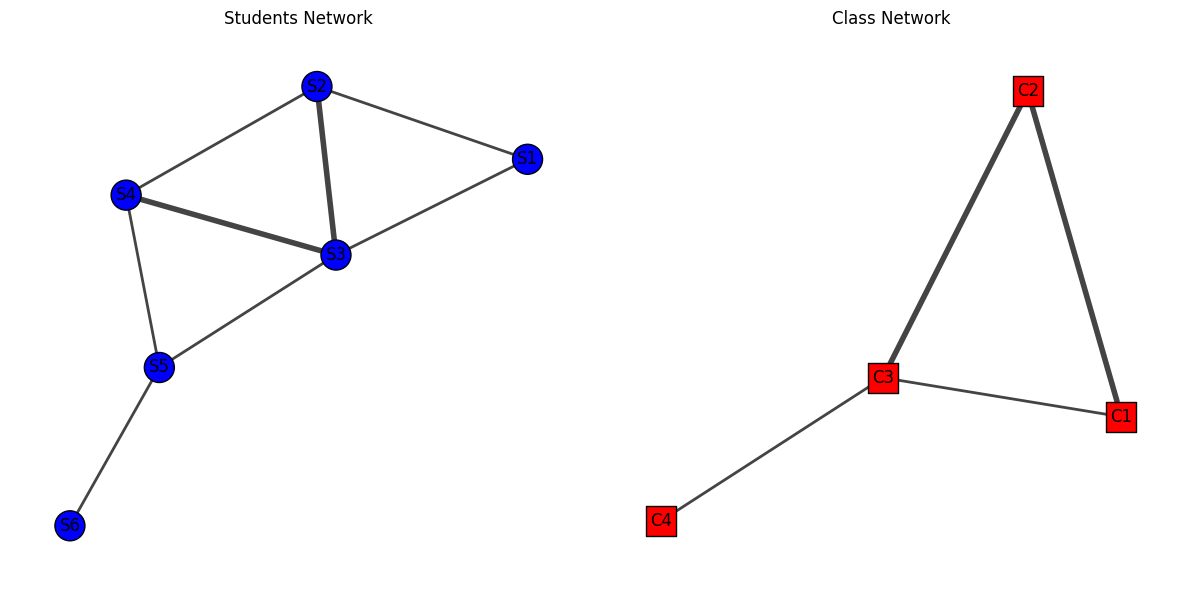

In [36]:
# Create edge widths for bn_students and bn_class
edge_width1 = [2 * weight for weight in bn_students.es["weight"]]
edge_width2 = [2 * weight for weight in bn_class.es["weight"]]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot bn_students
ig.plot(
    bn_students,
    target=axes[0],  # First subplot
    vertex_label=bn_students.vs['name'],
    edge_width=edge_width1,
    vertex_size=30,
    vertex_label_degree=-2.1416 / 2,
    vertex_label_cex=2,
    vertex_shape="circle",
    vertex_color="blue"
)
axes[0].set_title('Students Network')

# Plot bn_class
ig.plot(
    bn_class,
    target=axes[1],  # Second subplot
    vertex_label=bn_class.vs['name'],
    edge_width=edge_width2,
    vertex_size=30,
    vertex_label_degree=-2.1416 / 2,
    vertex_label_cex=2,
    vertex_shape="square",
    vertex_color="red"
)
axes[1].set_title('Class Network')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


## Continuacion luke capitulo 9

Para continuar con el capítulo 9 del libro de Luke, en lugar de hacerlo con la red bipartita Hollywood Affiliation Network, lo haremos con la del proyecto que se desarrolla en clase. En este caso, se trabajará con una red bipartita inducida por usuarios y series que estos observan, y en este caso, son animes.Los usuarios están conectados con las series que ven. Los datos provienen originalmente de este enlace y se trata de un conjunto de datos que contiene información sobre 17,562 animes y las preferencias de 325,772 usuarios diferentes de la página MyAnimeList. Dado que el conjunto de datos es tan extenso, se trabajará con los animes emitidos desde el 2020 hasta el primer semestre del 2021. Además de contener los nombres de los animes, incluye el rating de usuario que se utilizará como una variable nodal.

In [37]:
usuarios=pd.read_csv('animelist.csv',
                     na_values=["Unknown"],
                     header=0,
                     usecols=[0,1,2,3],
                     names=["user_id","anime_id","rating" ,"watching_status"],
                     dtype={"user_id":str,"anime_id":str,"rating":np.float64,"watching_status":np.float64})

In [38]:
anime=pd.read_csv('anime.csv', dtype={'id':str})

In [39]:
usuarios

,user_id,anime_id,rating,watching_status
0,0,67,9.00,1.00
1,0,6702,7.00,1.00
2,0,242,10.00,1.00
3,0,4898,0.00,1.00
4,0,21,10.00,1.00
...,...,...,...,...
109224742,353404,507,7.00,2.00
109224743,353404,392,9.00,2.00
109224744,353404,882,6.00,2.00
109224745,353404,883,8.00,2.00


In [40]:
anime=pd.read_csv('anime.csv', dtype={'id':str})


In [41]:
anime

,id,Name,Score,Genres,Episodes,Aired
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.00,Spring 1998
1,100,Shin Shirayuki-hime Densetsu Prétear,7.20,"Comedy, Drama, Fantasy, Magic, Romance, Shoujo...",13.00,Spring 2001
2,1000,Uchuu Kaizoku Captain Herlock,7.71,"Action, Sci-Fi, Adventure, Space, Drama, Seinen",42.00,Spring 1978
3,10000,Esper Mami Special: My Angel Mami-chan,NaN,"Comedy, Super Power, Supernatural",1.00,NaN
4,10003,Kago Shintarou Anime Sakuhin Shuu,5.01,"Comedy, Dementia, Horror, Seinen",15.00,NaN
...,...,...,...,...,...,...
16209,9991,Bremen 4: Jigoku no Naka no Tenshi-tachi,5.88,"Kids, Adventure",1.00,NaN
16210,9993,Samuraider: Nazo no Tenkousei,NaN,"Action, Drama, Samurai",1.00,NaN
16211,9996,Hyouge Mono,7.99,"Historical, Samurai, Seinen",39.00,Spring 2011
16212,9998,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,NaN,"Police, Comedy, Romance, Drama",1.00,NaN


Los géneros y el día de lanzamiento del DataFrame de los animes se convierten en cadenas de texto (strings) para facilitar la aplicación de filtros posteriormente.


In [42]:
anime['Genres'] = anime['Genres'].fillna('').astype(str) 
anime['Aired'] = anime['Aired'].fillna('').astype(str)# como hay NAS entonces el cuaderno de jupyter no lo lee

Al observar cómo está configurada la fecha de lanzamiento del anime, optamos por tomar únicamente aquellos que fueron lanzados a partir del 2020 y que tengan mas de 9 episodios.


In [43]:
anime['Aired']

0        Spring 1998
1        Spring 2001
2        Spring 1978
3                   
4                   
            ...     
16209               
16210               
16211    Spring 2011
16212               
16213               
Name: Aired, Length: 16214, dtype: object

In [44]:
anime = anime.query("Episodes > 9 & Aired.str.contains('202')").sort_values(by=["id"], ascending=True).reset_index(drop=True)


Se visualiza las IDs de los animes que quedaron después de realizar el filtrado.

In [45]:
id=anime['id'].unique()
id

array(['32455', '35252', '36458', '37345', '37522', '37576', '37587',
       '37599', '37870', '37890', '37962', '37984', '38005', '38256',
       '38302', '38337', '38474', '38476', '38481', '38555', '38656',
       '38668', '38669', '38790', '38830', '38835', '38843', '38853',
       '38883', '38909', '38924', '39017', '39184', '39292', '39388',
       '39463', '39469', '39534', '39535', '39547', '39551', '39575',
       '39582', '39583', '39587', '39609', '39617', '39681', '39710',
       '39730', '39783', '39790', '39792', '39808', '39942', '39948',
       '39960', '39966', '39988', '39990', '40010', '40028', '40045',
       '40046', '40056', '40059', '40074', '40075', '40085', '40128',
       '40136', '40137', '40148', '40165', '40221', '40230', '40272',
       '40358', '40359', '40392', '40397', '40403', '40417', '40436',
       '40454', '40473', '40483', '40496', '40497', '40504', '40513',
       '40529', '40530', '40532', '40540', '40550', '40571', '40591',
       '40594', '405

In [46]:
anime['Aired'].unique()

array(['Winter 2021', 'Winter 2020', 'Summer 2020', 'Fall 2020',
       'Spring 2020', 'Spring 2021'], dtype=object)

Se filtra el DataFrame de los usuarios tomando únicamente las filas que tengan el ID de los animes y el estado "completo", es decir, que ya terminaron de ver la serie.


In [47]:
usuarios=(usuarios
 .query('anime_id in @id and watching_status==2')
.sort_values(by=["user_id", "anime_id"], ascending=[True, True]).reset_index(drop=True))


In [48]:
usuarios=usuarios.drop(['watching_status'], axis=1)

Se realiza un left join con las dos bases de datos restantes.


In [49]:
usuarios=usuarios.merge(anime,left_on="anime_id",right_on="id",how="left")


In [50]:
usuarios

,user_id,anime_id,rating,id,Name,Score,Genres,Episodes,Aired
0,1,38883,8.00,38883,Haikyuu!!: To the Top,8.39,"Comedy, Sports, Drama, School, Shounen",13.00,Winter 2020
1,1,39547,9.00,39547,Yahari Ore no Seishun Love Comedy wa Machigatt...,8.46,"Slice of Life, Comedy, Drama, Romance, School",12.00,Summer 2020
2,1,39587,9.00,39587,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,8.50,"Psychological, Drama, Thriller, Fantasy",13.00,Summer 2020
3,1,40221,8.00,40221,Kami no Tou,7.66,"Action, Adventure, Mystery, Drama, Fantasy",13.00,Spring 2020
4,1,40776,9.00,40776,Haikyuu!!: To the Top 2nd Season,8.57,"Comedy, Sports, Drama, School, Shounen",12.00,Fall 2020
...,...,...,...,...,...,...,...,...,...
1052155,99997,40839,7.00,40839,"Kanojo, Okarishimasu",7.37,"Comedy, Romance, School, Shounen",12.00,Summer 2020
1052156,99997,40902,8.00,40902,Shokugeki no Souma: Gou no Sara,7.35,"Ecchi, School, Shounen",13.00,Spring 2020
1052157,99997,41226,5.00,41226,Uzaki-chan wa Asobitai!,7.05,"Slice of Life, Comedy, Romance, Ecchi",12.00,Summer 2020
1052158,99997,41345,6.00,41345,Noblesse,6.83,"Action, Supernatural, Vampire, School",13.00,Fall 2020


Se crean dos DataFrames: uno para los usuarios (USERS) y otro para los animes (ANIMES).
Para USERS:
- Se obtienen los valores únicos de la columna 'user_id'.
- Se generan identificadores únicos para cada usuario.
Para ANIM- Se generannerar identificadores únicos para cada anime, asegurando que sean distintos de los identificadores de usua

Para utilizar en la creación de un grafo con la librería `igraph`, es esencial que los identificadores sean únicos y distintos entre sí para evitar confusiones. rios.


In [51]:
USERS = pd.DataFrame((usuarios['user_id'].unique(),  # Obtener valores únicos de la primera columna
                  range(len(usuarios['user_id'].unique()))),  # Generar identificadores únicos
                 index=['user', 'Identificador']).T  # Transponer para obtener un DataFrame

# Creación del DataFrame para la segunda columna (C)
ANIMES = pd.DataFrame((usuarios['anime_id'].unique(),  # Obtener valores únicos de la segunda columna
                  (np.full(len(usuarios['anime_id'].unique()), len(usuarios['user_id'].unique())) + range(len(usuarios['anime_id'].unique())))),  # Generar identificadores únicos
                      #ya hay identificadores unicos para todos los usuarios
                      # toca generar identificadores unicos para todos los animes
                 index=['anime', 'Identificador']).T  # Transponer para obtener un DataFrame

Se crea un DataFrame con los identificadores únicos como nuevas columnas.


In [52]:
Identificados=usuarios.merge(USERS,left_on='user_id',right_on="user",how="left").merge(ANIMES,left_on='anime_id',right_on="anime",how="left")
Identificados

,user_id,anime_id,rating,id,Name,Score,Genres,Episodes,Aired,user,Identificador_x,anime,Identificador_y
0,1,38883,8.00,38883,Haikyuu!!: To the Top,8.39,"Comedy, Sports, Drama, School, Shounen",13.00,Winter 2020,1,0,38883,111199
1,1,39547,9.00,39547,Yahari Ore no Seishun Love Comedy wa Machigatt...,8.46,"Slice of Life, Comedy, Drama, Romance, School",12.00,Summer 2020,1,0,39547,111200
2,1,39587,9.00,39587,Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,8.50,"Psychological, Drama, Thriller, Fantasy",13.00,Summer 2020,1,0,39587,111201
3,1,40221,8.00,40221,Kami no Tou,7.66,"Action, Adventure, Mystery, Drama, Fantasy",13.00,Spring 2020,1,0,40221,111202
4,1,40776,9.00,40776,Haikyuu!!: To the Top 2nd Season,8.57,"Comedy, Sports, Drama, School, Shounen",12.00,Fall 2020,1,0,40776,111203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052155,99997,40839,7.00,40839,"Kanojo, Okarishimasu",7.37,"Comedy, Romance, School, Shounen",12.00,Summer 2020,99997,111198,40839,111233
1052156,99997,40902,8.00,40902,Shokugeki no Souma: Gou no Sara,7.35,"Ecchi, School, Shounen",13.00,Spring 2020,99997,111198,40902,111204
1052157,99997,41226,5.00,41226,Uzaki-chan wa Asobitai!,7.05,"Slice of Life, Comedy, Romance, Ecchi",12.00,Summer 2020,99997,111198,41226,111231
1052158,99997,41345,6.00,41345,Noblesse,6.83,"Action, Supernatural, Vampire, School",13.00,Fall 2020,99997,111198,41345,111275


Se crea la matriz de aristas.

In [53]:
Aristas=Identificados[['Identificador_x', 'Identificador_y']]
Aristas

,Identificador_x,Identificador_y
0,0,111199
1,0,111200
2,0,111201
3,0,111202
4,0,111203
...,...,...
1052155,111198,111233
1052156,111198,111204
1052157,111198,111231
1052158,111198,111275


Se crea una concatenación para identificar los usuarios y los animes, llamada "type", para que igraph reconozca el grafo como un grafo bipartita. Posteriormente, se agregan las respectivas IDs como nombres y se convierte la matriz de aristas a tipo entero para evitar problemas al usarla en igraph.


In [54]:
type=np.concatenate((np.full(len(usuarios['user_id'].unique()), 'usuario'), np.full(len(usuarios['anime_id'].unique()), 'anime')))
Bool_type=np.concatenate((np.full(len(usuarios['user_id'].unique()), True), np.full(len(usuarios['anime_id'].unique()), False))) # para hacer la proyeccion

In [55]:
name=np.concatenate((usuarios['user_id'].unique(),usuarios['Name'].unique()))

In [56]:
# Assuming Aristas is your DataFrame
Aristas['Identificador_x'] = Aristas['Identificador_x'].astype(int)
Aristas['Identificador_y'] = Aristas['Identificador_y'].astype(int)


C:\Users\Pc\AppData\Local\Temp\ipykernel_5584\1100820221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Pc\AppData\Local\Temp\ipykernel_5584\1100820221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Creación del grafo mediante igraph


Dada la magnitud de la base de datos de los usuarios, se realizará un muestreo de 500 de estos para poder recrear adecuadamente el capítulo 9 de Luke.


In [57]:
random.seed(4212)
muestra_usuarios=random.sample(list(Aristas['Identificador_x'].unique()), 500)

Aristas_Muestra=(Aristas
 .query(' Identificador_x in @muestra_usuarios').reset_index(drop=True))


In [58]:
Aristas_Muestra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4568 entries, 0 to 4567
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Identificador_x  4568 non-null   int32
 1   Identificador_y  4568 non-null   int32
dtypes: int32(2)
memory usage: 35.8 KB


In [59]:
g = ig.Graph.DataFrame(Aristas, directed=False) 
g.vs['type']=type
g.vs['Bool type']=Bool_type                   # para volverlo bipartita
g.vs['name']=name

In [60]:
ig.summary(g)

IGRAPH UN-T 111376 1052160 -- 
+ attr: Bool type (v), name (v), type (v)


In [61]:
Vertices = list(Aristas_Muestra['Identificador_x'].unique()) + list(Aristas_Muestra['Identificador_y'].unique())

In [62]:
gm=g.subgraph(vertices=Vertices)

In [63]:
ig.summary(gm)

IGRAPH UN-T 635 4568 -- 
+ attr: Bool type (v), name (v), type (v)


# Análisis de la Red Usuario - Anime: MyAnimeList
Los primeros pasos para analizar estos datos son cargar el archivo y explorar la estructura básica de la red.



summary

In [64]:
print(gm.es.graph)

IGRAPH UN-T 635 4568 --
+ attr: Bool type (v), name (v), type (v)
+ edges (vertex names):
               100279 -- Kami no Tou, Darwin's Game
                10058 -- Haikyuu!!: To the Top, Yahari Ore no Seishun Love
Comedy wa Machigatteiru. Kan, Re:Zero kara Hajimeru Isekai Seikatsu 2nd
Season, Kami no Tou, Haikyuu!!: To the Top 2nd Season, Sword Art Online:
Alicization - War of Underworld 2nd Season, Runway de Waratte
               102533 -- Darwin's Game, Kaguya-sama wa Kokurasetai?:
Tensai-tachi no Renai Zunousen, Otome Game no Hametsu Flag shika Nai Akuyaku
Reijou ni Tensei shiteshimatta..., Honzuki no Gekokujou: Shisho ni Naru Tame
ni wa Shudan wo Erandeiraremasen 2nd Season, Kanojo, Okarishimasu, Isekai
Quartet 2
               103746 -- Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai
Zunousen
               106212 -- Itai no wa Iya nano de Bougyoryoku ni Kyokufuri
Shitai to Omoimasu., Kyokou Suiri, Darwin's Game, Sword Art Online:
Alicization - War of Underworld 2nd Season,

In [65]:
for index in range(-10, 0):
    print(gm.vs['name'][index])

Eternity: Shinya no Nurekoi Channel ♡
Asatir: Mirai no Mukashi Banashi
Chou Futsuu Toshi Kashiwa Densetsu R
Komatta Jiisan
Get Up! Get Live! #Geragera
Himitsukessha Taka no Tsume: Golden Spell
Jujutsu Kaisen (TV)
5-toubun no Hanayome ∬
SK∞
Jaku-Chara Tomozaki-kun


In [66]:
for index in range(0,10):
    print(g.vs['type'][index])

usuario
usuario
usuario
usuario
usuario
usuario
usuario
usuario
usuario
usuario


In [67]:
for index in range(-10, 0):
    print(g.vs['type'][index])

anime
anime
anime
anime
anime
anime
anime
anime
anime
anime


Asignacion de shape segun el type del nodo

La descripción resumida indica que la **Red Usuario - Anime: MyAnimeList** es de hecho una red bipartita. Podemos deducir que los vínculos conectan a cada usuario con las series que este ha visto. También revela que la red tiene 635 nodos y 4568 vínculos. Esto es un poco más difícil de descifrar para una red de afiliación, pero dado lo que ya sabemos, podemos deducir que hay 135 nodos de series, 500 nodos de actores y los 4568 vínculos surgen de cada series que he vista por un usuario. 

La red completa es demasiado grande para mostrarla aquí, pero podemos examinar un pequeño subconjunto antes de realizar análisis más enfocados. Como primer paso, podemos aprovechar la capacidad de `igraph` para almacenar informacimo. En este caso, el color y la forma del nodo pueden ser designados definiéndolos como atributos de vérteicdos.")

In [68]:
import matplotlib.colors as mcolors
# adaptado de chat gpt 
def adjustcolor(color_name, alpha):
    # Convertir nombre de color a RGB
    rgb = mcolors.CSS4_COLORS.get(color_name)
    if rgb is None:
        raise ValueError(f"El color '{color_name}' no es válido.")
    
    # Convertir RGB a hexadecimal
    r, g, b = mcolors.to_rgb(rgb)
    hex_color = f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}'
    
    # Agregar canal alpha
    return f'{hex_color}{int(255 * alpha):02x}'





In [69]:
colors=[adjustcolor('red',0.3),adjustcolor('royalblue',0.2) ]
shapes=['square','circle']
shape = []
color = []

# Asignar formas y colores a los vértices
for type in gm.vs['type']:
    if type == 'anime':
        idx = 0
    else:
        idx = 1
    shape.append(shapes[idx])  # Acceder a la forma correspondiente
    color.append(colors[idx])  # Acceder al color correspondiente

# Asignar las formas y colores a los vértices
gm.vs['shape'] = shape
gm.vs['color'] = color
gm.vs['vertex_frame_color'] = color  # Asignar el color del marco de los vértices

Para el primer gráfico, vamos a analizar un subconjunto de los animes más importantes de las temporadas de invierno, primavera, verano y otoño de MyAnimeList del año 2020. Este ejemplo también ilustra cómo crear un subgrafo extrayendo solo las aristas que son incidentes a vértices de nuestro interés (en este caso, queremos tener los vértices que están únicamente relacionados con los animes más famosos del año 2020). La clave aquí es el método `select` de la subclase `Graph.vs` y los métodos `subgraph`, `neighborhood` de la clase `Graph`. El método `select` busca vértices con algunas características, en este caso, el nombre. Posteriormente, con el método `neighborhood`, se extraen los vértices adyacentes a algún vértice en particular, se crea una lista con esto y finalmente se crea un subgrafo con el método `subgraph`.


Hacemos una busqueda de los animes mas importates de la temporada de invierno primavera verano y otoño de myanimelist y hacemos su respectivo subgrafo

In [70]:
Names=(Identificados
    .query("Name.str.contains('Yahari Ore no Seishun Love Comedy wa Machigatteiru. Kan|Kaguya-sama|Haikyuu!!: To the Top|Jujutsu Kaisen')")
    .query('~Name.str.contains("Haikyuu!!: To the Top 2nd Season")')
)['Name'].unique()


Como se genero un nuevo subgrafo los indices cambiarn asi que con vs.select encoentramos cuales son estos nuevos indices

In [71]:
new_ID=gm.vs.select(name_in=Names)

In [72]:
new_ID.indices

[500, 501, 519, 631]

con neiggborhood encontramos los indices  de los vertices que se pueden alcanzar desde el grafo

In [73]:
populares = []

# Iterar sobre los vértices y obtener sus vecindarios
for i in new_ID.indices:
    vecindario = gm.neighborhood(i)
    populares.extend(vecindario) # para ir añadiendo a la lista

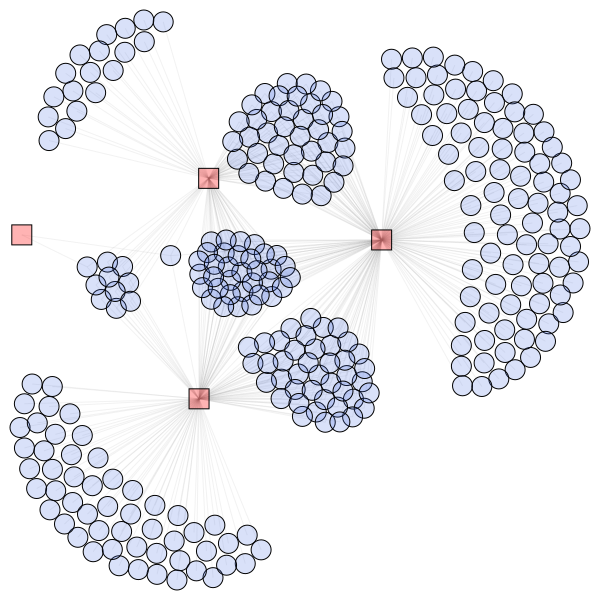

In [74]:
random.seed(4212)
ig.plot(gm.subgraph(vertices=populares),background=None,edge_color =adjustcolor('gray',0.1))

Se puede aprender mucho de toda la red de animes. La mayoría de las estadísticas descriptivas de redes se pueden aplicar a las redes de afiliación, pero a menudo necesitan ser ajustadas ya sea en cómo están construidas o en cómo se interpretan. Por ejemplo, la densidad general de la red de afiliación se puede calcular fácilmente, pero no es muy significativa dada la forma en que se recopilaron los datos de la red (cada usuario, por definición, está conectado a un anime) y que no puede haber vínculos entre nodos de series o entre nodos de animes.


In [75]:
gm.density()

0.022693062420825156

En cambio, el grado de los nodos puede ser más informativo, al menos para los usuarios. El método `degree` y el método `select` permiten especificar qué vértices incluir, y se utiliza para seleccionar solo los actores (para los cuales la característica del nodo type es usuario).


In [76]:
np.mean(gm.degree(vertices=gm.vs.select(type_in='usuario'))) # encontramos el grado de los usuarios

9.136

In [77]:
pd.DataFrame({'grado': gm.degree(vertices=gm.vs.select(type_in='usuario'))})['grado'].value_counts()

grado
1      100
2       52
4       37
3       35
6       30
7       27
5       23
11      22
10      18
13      15
12      13
9       13
8       13
14      11
17      10
15      10
19       7
23       7
18       7
27       6
28       4
34       3
21       3
35       3
25       3
36       2
16       2
31       2
29       2
26       2
43       2
37       1
67       1
39       1
93       1
30       1
59       1
46       1
111      1
22       1
24       1
32       1
40       1
52       1
33       1
20       1
53       1
Name: count, dtype: int64

Esto nos enseña que la mayoría de los usuarios han visto más de 10 animes que han salido durante el período de tiempo que se estudió. Si calculamos un promedio del grado, podemos observar que cada usuario ha visto 9.1 animes de la temporada. Esta informacion nos puede ayudar a identificar los usuarios mas activos.

In [78]:
for i in gm.vs.select(type_in='usuario' , _degree_gt=9):
    print(i['name'])
# identificamos los usuarios que han visto 9 animes o mas animes debido al argumento _degree_gt

106312
107074
10811
109318
110335
111155
114826
11492
115925
115983
117827
119686
119925
120047
120491
126538
127412
128873
129107
132563
132825
133134
136240
139058
141159
141808
146879
149152
151344
15161
152678
15520
155243
15673
159214
15983
160128
160522
161065
161903
16201
162030
162957
163439
169290
171266
171505
176694
179380
184851
185990
191646
192393
19448
196632
197192
19889
201727
202393
205833
206295
206522
207049
207185
207191
207248
208026
210397
211355
212172
213591
216692
218376
220482
229455
230434
232568
23408
235111
236191
240620
242172
243238
243293
243821
244761
244796
245173
24603
246828
24843
249542
251620
252228
252504
253111
253739
254028
256938
258969
260925
263012
274064
274231
275716
277544
280629
28118
283494
284292
28797
288212
290015
292433
292524
29261
294071
294610
298134
3004
302520
30288
304589
312395
312480
316663
319956
324372
326234
327807
328141
329828
332309
333369
33365
334620
335748
345243
346988
350407
352683
35787
39122
44171
45948
47509
52

In [79]:
Identificados.groupby('Name').mean('Score')

,rating,Score,Episodes
Name,,,
100-man no Inochi no Ue ni Ore wa Tatteiru,5.46,6.45,12.00
2.43: Seiin Koukou Danshi Volley-bu,0.00,6.41,12.00
22/7,5.91,6.81,12.00
5-toubun no Hanayome ∬,5.20,8.05,12.00
A3! Season Autumn & Winter,5.92,7.26,12.00
...,...,...,...
Yesterday wo Utatte,6.18,7.02,12.00
Yuukoku no Moriarty,6.98,7.97,11.00
Zhandou Wang Zhi Jufeng Zhan Hun 5: Heti Fanwai Pian,2.50,NaN,10.00


In [80]:
anime

,id,Name,Score,Genres,Episodes,Aired
0,32455,Gekidol,5.76,Music,12.00,Winter 2021
1,35252,Hatena☆Illusion,5.37,"Comedy, Supernatural, Romance, Ecchi",12.00,Winter 2020
2,36458,Soukou Musume Senki,5.30,"Action, Military, Fantasy",12.00,Winter 2021
3,37345,Plunderer,6.50,"Action, Ecchi, Fantasy, Shounen",24.00,Winter 2020
4,37522,Pet,6.48,"Mystery, Psychological, Supernatural, Seinen",13.00,Winter 2020
...,...,...,...,...,...,...
200,43325,Yuukoku no Moriarty 2nd Season,NaN,"Mystery, Historical, Psychological, Shounen",13.00,Spring 2021
201,43350,Gebäude Bäude,6.33,"Sci-Fi, Comedy",10.00,Fall 2020
202,43729,Semi wa Magic Cube 2nd Season,NaN,"Action, Fantasy",26.00,Spring 2020
203,45207,Okashi na Sabaku no Suna to Manu,NaN,Comedy,50.00,Winter 2021


Esto nos dice quiénes fueron los usuarios más activos. Si quisiéramos evaluar la calificación promedio de los animes vistos por los usuarios, podríamos hacerlo accediendo a las características de cada anime que el usuario ha visto. Esto es un poco más complicado que el ejemplo anterior, pero se puede hacer utilizando las habilidades de igraph para identificar los vecinos adyacentes para cualquier nodo en el grafo.

El siguiente código recorre los nodos de actor en la red y suma el rating o calificación de todos los vecinos de cada nodo, calculando su respectiva media.
).

In [81]:
# Inicializa una lista vacía para almacenar las medias de los usuarios
medias_usuarios = []

# Itera a través de los vértices
for i in gm.vs.select(type_in='usuario' , _degree_gt=9):
    n = gm.neighborhood(i)
    # Extrae nombres de los vertices adyacentes a ese usuario
    nombres = Identificados.query('Identificador_x in @n')['Name']
    # Calcula la media de puntuación para los animes que ve el usuario
    media_puntuacion = anime.query('Name in @nombres')['Score'].mean()
    # Añade el usuario y su media de puntuación a la lista
    medias_usuarios.append({'Usuario': i['name'], 'Media': media_puntuacion, 'Grado' :  gm.degree(vertices=gm.vs.select(name_in=i['name']))[0] })

# Crea un DataFrame a partir de la lista de diccionarios
df_medias_usuarios = pd.DataFrame(medias_usuarios)

Una vez que tenemos esto, podemos examinar una vez más a los usuarios, lo cual se basa tanto en el número de animes vistos como en la media de calificación de estos.

In [82]:
df_medias_usuarios.sort_values(by='Media', ascending=False) # ordenamos el df de acuerdo a la media

,Usuario,Media,Grado
5,111155,7.53,10
27,149152,7.52,10
123,312395,7.49,13
110,28797,7.48,11
146,52752,7.48,13
...,...,...,...
95,253111,7.05,59
100,260925,7.04,35
109,284292,7.03,67
101,263012,6.99,93


Finalmente, las características de la red siempre se pueden examinar utilizando enfoques gráficos y estadísticos más tradicionales. Por ejemplo, podemos ver si los usuarios que ven más animes también ven animes mejor o peor calificados, en promedio. Así, se puede examinar un simple gráfico de dispersión y regresión para ver la relación entre el número de animes y las calificaciones promedio de estos animes. Los resultados sugieren que no hay una relación clara entre qué tan activo es el usuario y la calificación de los animes que ve. El gráfico de dispersión también sugiere que a medida que se ven más animes, tienden a verse animes con una calificación menor.

In [83]:
import statsmodels.api as sm

# Definir variables independientes (X) y dependiente (y)
X = df_medias_usuarios[[ 'Grado']]
y = df_medias_usuarios['Media']  # Reemplaza 'Valor_a_predecir' con el nombre de la columna que contiene los valores que deseas predecir

# Añadir constante a X (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener los coeficientes de la regresión
coeficientes = modelo.params

# Imprimir los coeficientes
print(coeficientes)

const    7.33
Grado   -0.00
dtype: float64


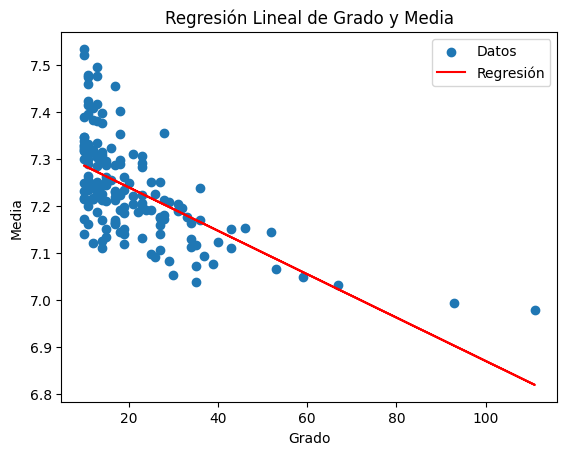

In [84]:
import matplotlib.pyplot as plt

# Graficar los puntos de datos
plt.scatter(df_medias_usuarios['Grado'], df_medias_usuarios['Media'], label='Datos')

# Añadir la línea de regresión ajustada
plt.plot(df_medias_usuarios['Grado'], modelo.predict(X), color='red', label='Regresión')

# Etiquetas y título
plt.xlabel('Grado')
plt.ylabel('Media')
plt.title('Regresión Lineal de Grado y Media')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


## 9.3.2 Análisis de las Proyecciones



Siguiendo los mismos procedimientos presentados en la Sección 9.2.4, se pueden crear y analizar las dos proyecciones de la red de **Red Usuario - Anime: MyAnimeList**. Esto producirá una red de usuarios donde los usuarios tienen conexiones si vieron el mismo anime, y una red de animes donde los animes están conectados si fueron vistos por el mismo usuario. La proyección de usuarios tendrá así 500 nodos, y la red de proyección de animes tendrá 135 nodos.


In [85]:
gm.vs['type']=gm.vs['Bool type']

In [86]:
projection=gm.bipartite_projection()

In [87]:
g_animes=projection[0]
ig.summary(g_animes)

IGRAPH UNWT 135 7582 -- 
+ attr: Bool type (v), color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


In [88]:
g_usuarios=projection[1]
ig.summary(g_usuarios)

IGRAPH UNWT 500 66933 -- 
+ attr: Bool type (v), color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


In [89]:
anime.head()

,id,Name,Score,Genres,Episodes,Aired
0,32455,Gekidol,5.76,Music,12.00,Winter 2021
1,35252,Hatena☆Illusion,5.37,"Comedy, Supernatural, Romance, Ecchi",12.00,Winter 2020
2,36458,Soukou Musume Senki,5.30,"Action, Military, Fantasy",12.00,Winter 2021
3,37345,Plunderer,6.50,"Action, Ecchi, Fantasy, Shounen",24.00,Winter 2020
4,37522,Pet,6.48,"Mystery, Psychological, Supernatural, Seinen",13.00,Winter 2020


In [90]:
calificacion=[]
for name in g_animes.vs['name']:
   calificacion.append(anime.query('Name == @name').reset_index()['Score'][0])

In [91]:
g_animes.vs['calificacion']=calificacion

En esta figura, se presenta toda la red de animes, con el tamaño de los nodos basado en el rating o calificación, de modo que los animes más populares tienen nodos más grandes.


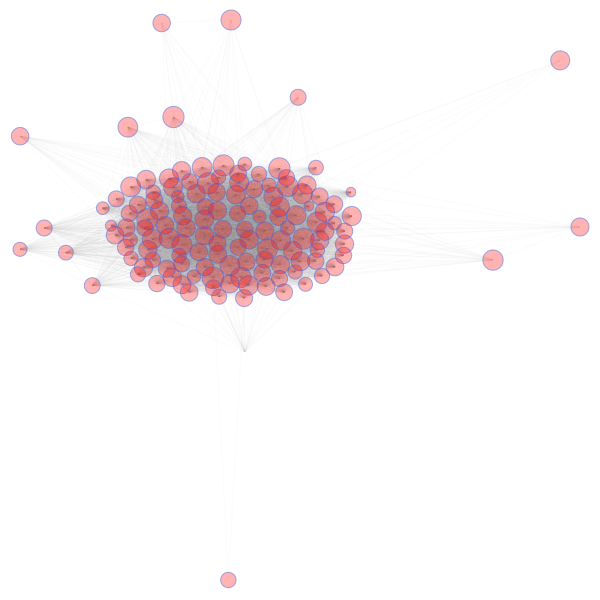

In [92]:
random.seed(4212)
ig.plot(g_animes,
        edge_color =adjustcolor('gray',0.035),
        vertex_frame_color =adjustcolor('royalblue',0.5),
        vertex_shape='circle',
       vertex_size=[ 2.5*d for d in g_animes.vs['calificacion']])

Algunas descripciones básicas de la red proporcionan más información sobre la **Red Usuario - Anime: MyAnimeList**. Se puede observar que no hay ningún anime aislado, por lo tanto, estos forman una gran componente conectada.


In [93]:
g_animes.density()

0.838253178551686

In [94]:
len(g_animes.clusters())

C:\Users\Pc\AppData\Local\Temp\ipykernel_5584\195871910.py:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead


1

La red completa de animes puede filtrarse para examinar el único gran componente como no hay componentes aisladas vamos a mirar las componentes que tengan un rating o calificacion mayor a 7.8. En la próxima figura, el ancho del borde se ha establecido igual a la raíz cuadrada del atributo de borde weight. Esto hace que los vínculos sean más gruesos para los animes que comparten mas usuarios entre ellas 

In [95]:
i=0
vertices_8=[]
for c in g_animes.vs['calificacion']:
    if c > 7.8:
        vertices_8.append(i)
        i=i+1
    else :
        i=i+1

La siguiente figura de la red tiene una densidad relativamente alta, lo que hace que sea algo difícil interpretar cualquier característica estructural interesante. Para ayudar con eso, podemos identificar los núcleos de mayor densidad del grafo y usar eso para "acercarnos" a la parte más interconectada de la red. (Consulte el Capítulo 8 para obtener más información).

Esta red es lo suficientemente pequeña como para que podamos agregar etiquetas de nodos para ayudar con la interpretación. Esto nos ayuda a ver que las secciones más estrechamente conectadas de la red corresponden a series o películas populares, en particular, parece que hay un camino con componentes que tienen un peso mayor a los demás.
).

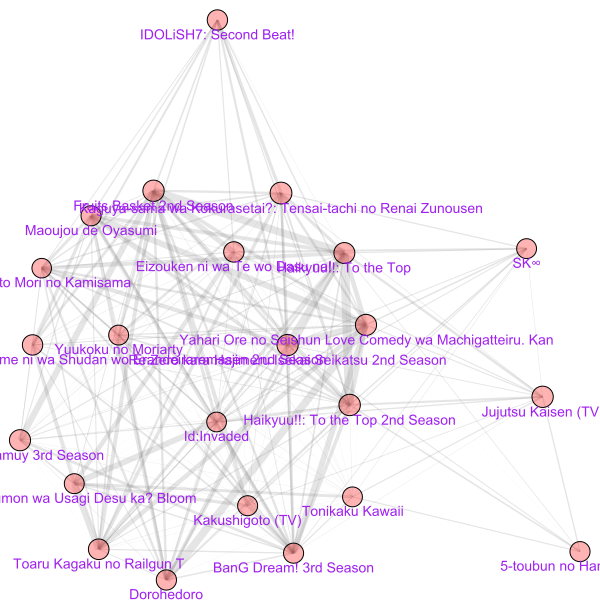

In [96]:
random.seed(4)

ig.plot(g_animes.induced_subgraph(vertices_8),
        edge_color=adjustcolor('gray', 0.2),
        vertex_shape='circle',
        vertex_size=[2.5 * d for d in g_animes.induced_subgraph(vertices_8).vs['calificacion']],
        vertex_label=g_animes.induced_subgraph(vertices_8).vs['name'],
        vertex_label_cex=1,  # Tamaño del texto de las etiquetas de los vértices
        edge_width=[0.1 * w for w in g_animes.es['weight']],
        vertex_label_color="purple",  # Color del texto de las etiquetas de los vértices
        vertex_label_dist=0.8)


## 3.Considere la base de datos de su interés que reportó en el Taller 2.

In [97]:
name=np.concatenate((usuarios['user_id'].unique(),usuarios['Name'].unique()))

In [98]:
g = ig.Graph.DataFrame(Aristas, directed=False) 
g.vs['type']=Bool_type                  # para volverlo bipartita
g.vs['name']=name

In [99]:
colors=[adjustcolor('royalblue',0.3),adjustcolor('purple',0.3) ]
shapes=['circle','circle']
shape = []
color = []

# Asignar formas y colores a los vértices
for type in g.vs['type']:
    if type == 'anime':
        idx = 0
    else:
        idx = 1
    shape.append(shapes[idx])  # Acceder a la forma correspondiente
    color.append(colors[idx])  # Acceder al color correspondiente

# Asignar las formas y colores a los vértices
g.vs['shape'] = shape
g.vs['color'] = color
g.vs['vertex_frame_color'] = color  # Asignar el color del marco de los vértices

In [100]:
g_anime= g.bipartite_projection(which=0) # para obtener Y'Y YY'

In [101]:
ig.summary(g_anime)

IGRAPH UNWT 177 12313 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


In [102]:
random.seed(12)
grafico=ig.plot(g_anime,
               edge_color =adjustcolor('gray',0.1),
        vertex_frame_color =adjustcolor('purple',0.5),)
grafico.save("grafico.png")
# adaptado de 

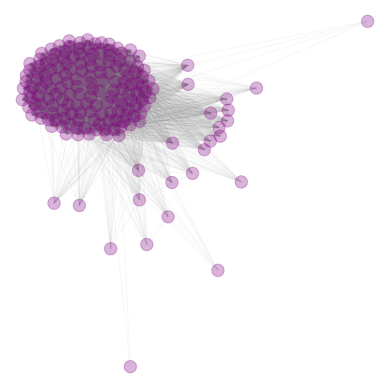

In [103]:
# Lee la imagen
image = plt.imread("grafico.png")

# Plotea la imagen
plt.imshow(image)
plt.axis('off')  # Desactiva los ejes
plt.show()

**(a)** 
Caracterizar la centralidad de los nodos.

In [104]:
# Agregar las métricas de centralidad al DataFrame ANIMES
ANIMES = ANIMES.assign(
    Closeness_Weighted=g_anime.closeness( weights=g_anime.es['weight']),
    Closeness_Unweighted=g_anime.closeness(),
    Betweenness_Weighted=g_anime.betweenness(directed=False, weights=g_anime.es['weight']),
    Betweenness_Unweighted=g_anime.betweenness(directed=False),
    Eigenvector_Weighted=g_anime.eigenvector_centrality(directed=False, weights=g_anime.es['weight']),
    Eigenvector_Unweighted=g_anime.eigenvector_centrality(directed=False)
)

# Mostrar las primeras filas del DataFrame ANIMES con las nuevas columnas
ANIMES = ANIMES.merge(anime,left_on='anime',right_on="id",how="left")

In [105]:
# Ordenar el DataFrame por las medidas de centralidad y mostrar los 5 principales
top_closeness_weighted = ANIMES.sort_values(by='Closeness_Weighted', ascending=False).head(5)
top_closeness_unweighted = ANIMES.sort_values(by='Closeness_Unweighted', ascending=False).head(5)
top_betweenness_weighted = ANIMES.sort_values(by='Betweenness_Weighted', ascending=False).head(5)
top_betweenness_unweighted = ANIMES.sort_values(by='Betweenness_Unweighted', ascending=False).head(5)
top_eigenvector_weighted = ANIMES.sort_values(by='Eigenvector_Weighted', ascending=False).head(5)
top_eigenvector_unweighted = ANIMES.sort_values(by='Eigenvector_Unweighted', ascending=False).head(5)

# Mostrar los resultados
print("Top 5 Animes con Mayor Closeness Weighted:")
print(top_closeness_weighted[['Name', 'Closeness_Weighted']])
print("\nTop 5 Animes con Mayor Closeness Unweighted:")
print(top_closeness_unweighted[['Name', 'Closeness_Unweighted']])
print("\nTop 5 Animes con Mayor Betweenness Weighted:")
print(top_betweenness_weighted[['Name', 'Betweenness_Weighted']])
print("\nTop 5 Animes con Mayor Betweenness Unweighted:")
print(top_betweenness_unweighted[['Name', 'Betweenness_Unweighted']])
print("\nTop 5 Animes con Mayor Eigenvector Weighted:")
print(top_eigenvector_weighted[['Name', 'Eigenvector_Weighted']])
print("\nTop 5 Animes con Mayor Eigenvector Unweighted:")
print(top_eigenvector_unweighted[['Name', 'Eigenvector_Unweighted']])


Top 5 Animes con Mayor Closeness Weighted:
                                                  Name  Closeness_Weighted
153                           Oshiri Tantei 4th Season                0.85
154  Zhandou Wang Zhi Jufeng Zhan Hun 5: Heti Fanwa...                0.82
155                      Semi wa Magic Cube 2nd Season                0.58
3                                          Kami no Tou                0.52
2     Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season                0.52

Top 5 Animes con Mayor Closeness Unweighted:
                                                 Name  Closeness_Unweighted
2    Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season                  0.98
3                                         Kami no Tou                  0.98
19  Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...                  0.98
7                              The God of High School                  0.97
34                               Kanojo, Okarishimasu                  0.97

Top 

**(b)** 
Visualizar la red con un diseño adecuado teniendo en cuenta la centralidad d 
los nodos.

In [106]:
#l = g_anime.layout_davidson_harel()
# Cargar el objeto desde el archivo PKL

#with open("g_anime.pkl", "rb") as archivo:
#   g_anime = pickle.load(archivo)

# Cargar el objeto desde el archivo PKL

# Guardar el layout como un archivo pkl
#with open("layout_davidson_harel.pkl", "wb") as f:
#   pickle.dump(l, f)
# Cargar el layout desde el archivo pkl
with open("layout_davidson_harel.pkl", "rb") as f:
   l = pickle.load(f)

In [107]:
# Configurar la visualización
Grafo_C = ig.plot(g_anime, layout=l, vertex_size=[15 * np.sqrt(d) for d in ANIMES['Closeness_Weighted']], vertex_color=adjustcolor('skyblue', 0.3), edge_color=adjustcolor('gray', 0.02), 
        vertex_label=None, bbox=(400, 400), margin=40, main="Grado")
Grafo_uC = ig.plot(g_anime, layout=l, vertex_size=[15 * np.sqrt(d) for d in ANIMES['Closeness_Unweighted']], vertex_color=adjustcolor('skyblue', 0.3), edge_color=adjustcolor('gray', 0.02), 
        vertex_label=None, bbox=(400, 400), margin=40, main="Grado")
Grafo_B = ig.plot(g_anime, layout=l, vertex_size=[np.sqrt(d) for d in ANIMES['Betweenness_Weighted']], vertex_color=adjustcolor('orange', 0.3), edge_color=adjustcolor('gray', 0.02), 
        vertex_label=None, bbox=(400, 400), margin=40, main="Grado")
Grafo_uB = ig.plot(g_anime, layout=l, vertex_size=[np.sqrt(d) for d in ANIMES['Betweenness_Unweighted']], vertex_color=adjustcolor('orange', 0.3), edge_color=adjustcolor('gray', 0.02), 
        vertex_label=None, bbox=(400, 400), margin=40, main="Grado")
Grafo_E = ig.plot(g_anime, layout=l, vertex_size=[15 * np.sqrt(d) for d in ANIMES['Eigenvector_Weighted']], vertex_color=adjustcolor('purple', 0.3), edge_color=adjustcolor('gray', 0.02), 
        vertex_label=None, bbox=(400, 400), margin=40, main="Grado")
Grafo_uE = ig.plot(g_anime, layout=l, vertex_size=[15 * np.sqrt(d) for d in ANIMES['Eigenvector_Unweighted']], vertex_color=adjustcolor('purple', 0.3), edge_color=adjustcolor('gray', 0.02), 
        vertex_label=None, bbox=(400, 400), margin=40, main="Grado")

In [108]:
Grafo_uC.save("Grafo_uC.png")
Grafo_C.save("Grafo_C.png")
Grafo_B.save("Grafo_B.png")
Grafo_uB.save("Grafo_uB.png")
Grafo_E.save("Grafo_E.png")
Grafo_uE.save("Grafo_uE.png")

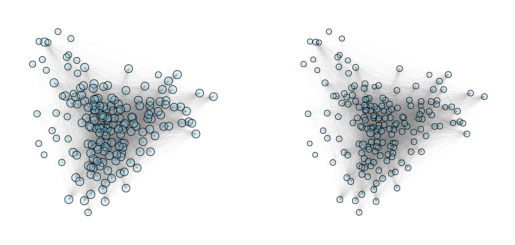

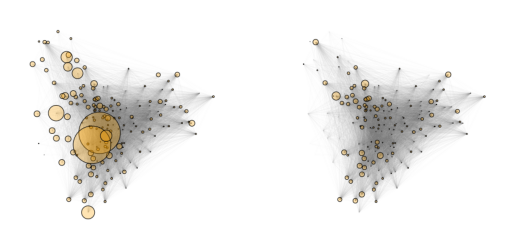

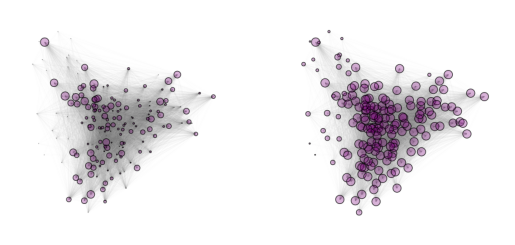

In [109]:
# Define una función para mostrar dos imágenes a la vez
def mostrar_dos_imagenes(imagen1, imagen2):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(imagen1)
    axs[0].axis('off')
    axs[1].imshow(imagen2)
    axs[1].axis('off')
    plt.show()

# Carga las imágenes
Grafo_uC = plt.imread("Grafo_uC.png")
Grafo_C = plt.imread("Grafo_C.png")
Grafo_B = plt.imread("Grafo_B.png")
Grafo_uB = plt.imread("Grafo_uB.png")
Grafo_E = plt.imread("Grafo_E.png")
Grafo_uE = plt.imread("Grafo_uE.png")

# Muestra las imágenes de dos en dos
mostrar_dos_imagenes(Grafo_uC, Grafo_C)
mostrar_dos_imagenes(Grafo_B, Grafo_uB)
mostrar_dos_imagenes(Grafo_E, Grafo_uE)


In [110]:
ig.summary(g_anime)

IGRAPH UNWT 177 12313 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


**(c)** Identificar los puntos de articulación, los puntos aislados y las componentes.


In [111]:
# Descomponer el grafo y contar los componentes
componentes = g_anime.decompose()
num_componentes = len(componentes)

# Imprimir la longitud de cada componente y enumerarlas
i=0
for  componente in componentes:
    i=i+1
    longitud = len(componente.vs)
    print(f"Componente {i}: Longitud {longitud}")

Componente 1: Longitud 177


In [112]:
# Encontrar los clanes en el grafo
clanes = g_anime.maximal_cliques()

# Imprimir el número de vértices en cada clan
print("Número de vértices por clan:")
for i, clan in enumerate(clanes, 1):
    num_vertices_clan = len(clan)
    print(f"Clan {i}: {num_vertices_clan} vértices")

Número de vértices por clan:
Clan 1: 3 vértices
Clan 2: 5 vértices
Clan 3: 6 vértices
Clan 4: 5 vértices
Clan 5: 5 vértices
Clan 6: 14 vértices
Clan 7: 13 vértices
Clan 8: 13 vértices
Clan 9: 13 vértices
Clan 10: 18 vértices
Clan 11: 18 vértices
Clan 12: 16 vértices
Clan 13: 22 vértices
Clan 14: 25 vértices
Clan 15: 26 vértices
Clan 16: 30 vértices
Clan 17: 20 vértices
Clan 18: 27 vértices
Clan 19: 20 vértices
Clan 20: 32 vértices
Clan 21: 28 vértices
Clan 22: 34 vértices
Clan 23: 52 vértices
Clan 24: 51 vértices
Clan 25: 49 vértices
Clan 26: 58 vértices
Clan 27: 58 vértices
Clan 28: 68 vértices
Clan 29: 70 vértices
Clan 30: 70 vértices
Clan 31: 137 vértices
Clan 32: 135 vértices
Clan 33: 136 vértices
Clan 34: 137 vértices
Clan 35: 138 vértices
Clan 36: 141 vértices
Clan 37: 141 vértices
Clan 38: 147 vértices


In [113]:
g_anime.articulation_points()

[]

In [114]:
g_anime.vertex_connectivity() # es 2 conectado

2

**(d)** Hacer la distribución de las distancia geodésica.


In [115]:
# Obtener los grados de salida y entrada de cada nodo
degree =g_anime.degree(mode='all')
strength=g_anime.strength(weights=g_anime.es['weight'])

# Crear DataFrames separados para los grados de salida y entrada
degree = pd.DataFrame(degree, columns=['degree'])
strength=pd.DataFrame(strength, columns=['strength'])
# Concatenar los DataFrames en uno solo
degree = pd.concat([degree, strength], axis=1)

degree

,degree,strength
0,169,"401,444.00"
1,162,"428,957.00"
2,173,"597,368.00"
3,173,"593,950.00"
4,169,"325,632.00"
...,...,...
172,51,51.00
173,51,51.00
174,51,51.00
175,13,13.00


C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:605: PlotnineWarning: Filename: histograma.png


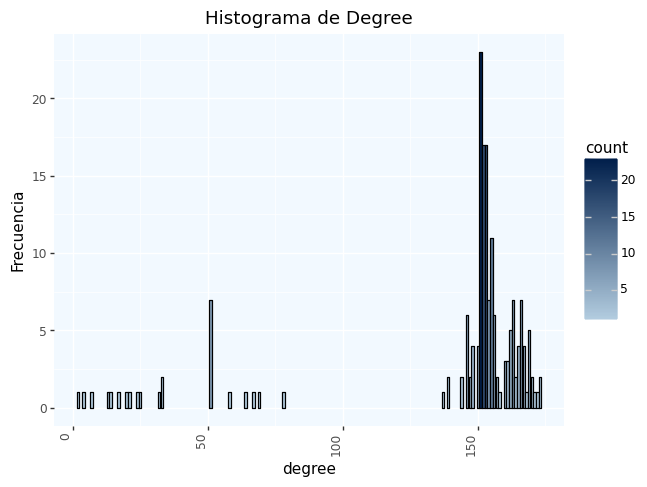

In [116]:
# Crear el histograma usando ggplot
histograma = (
    ggplot(degree, aes(x='degree', fill='..count..')) +  # Utilizamos ..count.. para hacer referencia al conteo de observaciones en el histograma
    geom_bar(color='black') +
    labs(title='Histograma de Degree', x='degree', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)

# Mostrar el histograma
histograma.save("histograma.png", dpi=300)
histograma.draw()



C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:605: PlotnineWarning: Filename: histograma_log.png


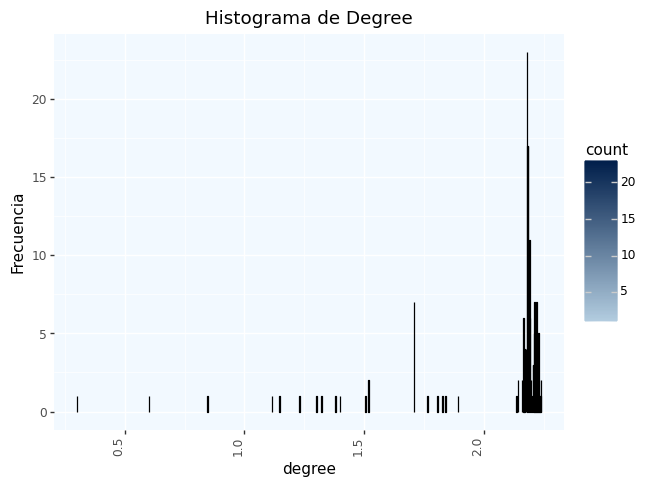

In [117]:
# Crear el histograma usando ggplot
histograma = (
    ggplot(degree, aes(x='np.log10(degree)', fill='..count..')) +  # Utilizamos ..count.. para hacer referencia al conteo de observaciones en el histograma
    geom_bar(color='black') +
    labs(title='Histograma de Degree', x='degree', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)

# Mostrar el histograma
histograma.save("histograma_log.png", dpi=300)
histograma.draw()

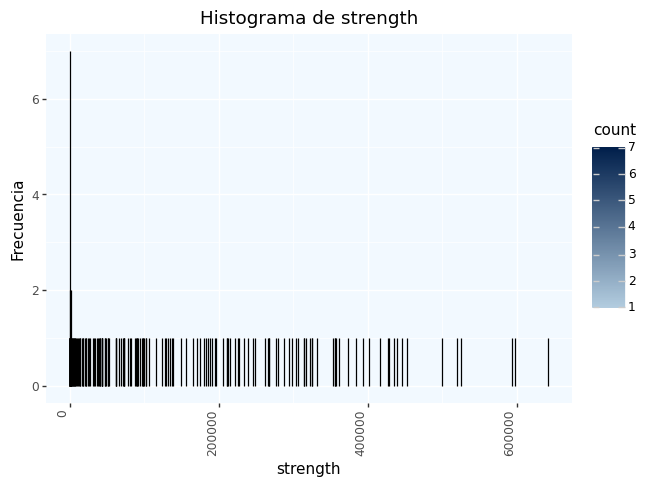

In [118]:
# Crear el histograma usando ggplot
histograma = (
    ggplot(degree, aes(x='strength', fill='..count..')) +  # Utilizamos ..count.. para hacer referencia al conteo de observaciones en el histograma
    geom_bar(color='black') +
    labs(title='Histograma de strength', x='strength', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)

# Mostrar el histograma
histograma.draw()

C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:604: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\ggplot.py:605: PlotnineWarning: Filename: fuerza.png
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 9'. Pick better value with 'binwidth'.
C:\Users\Pc\AppData\Local\Temp\ipykernel_5584\2145593961.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\Pc\miniconda3\envs\Redes\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 9'. Pick better value with 'binwidth'.


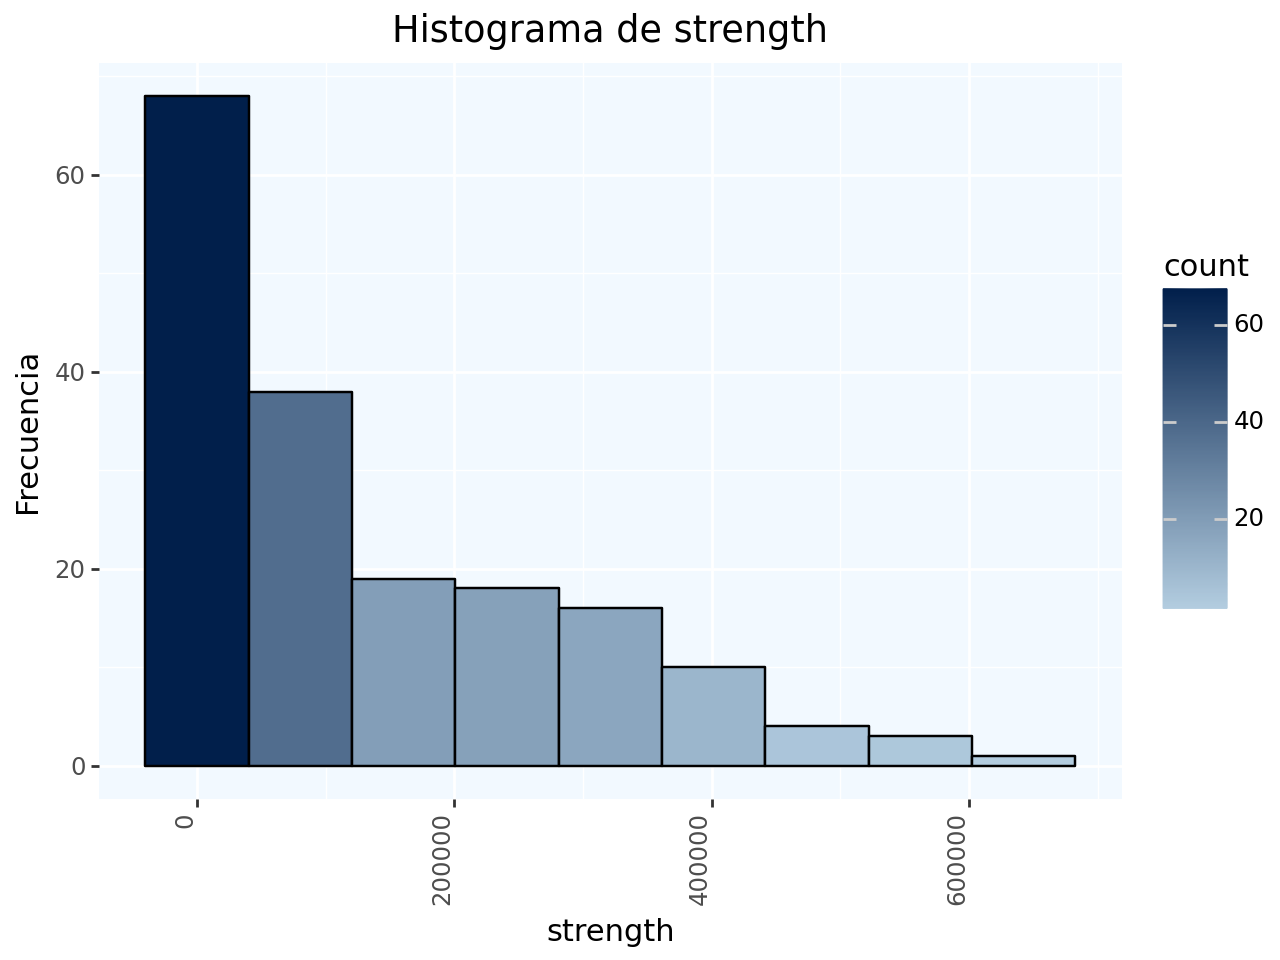

In [119]:
# Crear el histograma
histograma = (
    ggplot(degree, aes(x='strength', fill='..count..')) +  
    geom_histogram(color='black') +
    labs(title='Histograma de strength', x='strength', y='Frecuencia') +
    theme(axis_text_x=element_text(angle=90, hjust=1),  # Rotar etiquetas del eje x
          panel_background=element_rect(fill='#f2f9ff')) +  # Color de fondo del panel
    scale_fill_gradient(low="#b3cde0", high="#011f4b")  # Escala de colores
)
histograma.save("fuerza.png", dpi=300)
# Mostrar el histograma
print(histograma)

**(e)** Determinar si la red es libre de escala.

**(f)** Hacer un censo de los clanes y calcular el número clan.


In [120]:
ig.summary(g_anime)

IGRAPH UNWT 177 12313 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


In [121]:
len(g_anime.largest_cliques()[0])

147

**(g)** Calcular la densidad junto con el coeficiente de agrupamiento de la red.


In [122]:
g_anime.density()

0.7905110426296867

In [123]:
g_anime.transitivity_avglocal_undirected()# transitividad

0.952820877716844

In [124]:
ig.summary(g_anime)

IGRAPH UNWT 177 12313 -- 
+ attr: color (v), name (v), shape (v), type (v), vertex_frame_color (v), weight (e)


**(h)** Particionar la red usando tres métodos de agrupamiento de su elección. Visualizar los resultados obtenidos.


In [ ]:
ak_eb=g_animes.community_edge_betweenness()
ak_fg=g_animes.community_fastgreedy()
ak_im=g_animes.community_infomap()
ak_lp=g_animes.community_label_propagation()
ak_le=g_animes.community_leading_eigenvector()
ak_eb_w=g_animes.community_edge_betweenness(weights=g_animes.es['weight'])
ak_fg_w=g_animes.community_fastgreedy(weights=g_animes.es['weight'])
ak_im_w=g_animes.community_infomap(edge_weights=g_animes.es['weight'])
ak_lp_w=g_animes.community_label_propagation(weights=g_animes.es['weight'])
ak_le_w=g_animes.community_leading_eigenvector(weights=g_animes.es['weight'])




In [ ]:
import hashlib
# codigo adaptado de chat gpt
def get_color(integer):
    # Convert the integer to a unique string using hashing
    hash_object = hashlib.sha256(str(integer).encode())
    hex_dig = hash_object.hexdigest()
    # Convert the hexadecimal hash to RGB values
    r = int(hex_dig[:2], 16) % 256
    g = int(hex_dig[2:4], 16) % 256
    b = int(hex_dig[4:6], 16) % 256
    # Format RGB values into a color string
    color = "#{:02x}{:02x}{:02x}".format(r, g, b)
    return color

def get_colors_for_list(integer_list):
    colors = []
    for integer in integer_list:
        color = get_color(integer)
        colors.append(color)
    return colors



In [ ]:
print("Modularidad de fastgreedy:", round(ak_fg.as_clustering().modularity, 3))
print("Modularidad de edge betweenness:", round(ak_eb.as_clustering().modularity, 3))
print("Modularidad de infomap:", round(ak_im.modularity, 3))
print("Modularidad de label_propagation:", round(ak_lp.modularity, 3))
print("Modularidad de leading_eigenvector:", round(ak_le.modularity, 3))
print("Modularidad de edge betweenness weighted:", round(ak_eb_w.as_clustering().modularity, 3))
print("Modularidad de fastgreedy weighted:", round(ak_fg_w.as_clustering().modularity, 3))
print("Modularidad de infomap weighted:", round(ak_im_w.modularity, 3))
print("Modularidad de label_propagation weighted:", round(ak_lp_w.modularity, 3))
print("Modularidad de leading_eigenvector weighted:", round(ak_le_w.modularity, 3))


In [ ]:
random.seed(12)
grafico=ig.plot(g_anime,
               edge_color =adjustcolor('gray',0.1),
        vertex_frame_color =adjustcolor('purple',0.5),
               vertex_color= get_colors_for_list(ak_fg.as_clustering().membership))
grafico.save("fastgreedy.png")

random.seed(12)
grafico=ig.plot(g_anime,
               edge_color =adjustcolor('gray',0.1),
        vertex_frame_color =adjustcolor('purple',0.5),
               vertex_color= get_colors_for_list(ak_le.membership))
grafico.save("leading_eigenvector.png")
random.seed(12)
grafico=ig.plot(g_anime,
               edge_color =adjustcolor('gray',0.1),
        vertex_frame_color =adjustcolor('purple',0.5),
               vertex_color= get_colors_for_list(ak_fg_w.as_clustering().membership))
grafico.save("fastgreedy weighted.png")
random.seed(12)
grafico=ig.plot(g_anime,
               edge_color =adjustcolor('gray',0.1),
        vertex_frame_color =adjustcolor('purple',0.5),
               vertex_color= get_colors_for_list(ak_le_w.membership))
grafico.save("leading_eigenvector weighted.png")



**(i)** Hacer un análisis de asortatividad de la red.


In [ ]:
calificacion=[]
for name in g_anime.vs['name']:
   calificacion.append(anime.query('Name == @name').reset_index()['Score'][0])
g_anime.vs['calificacion']=calificacion

In [ ]:
g_anime.assortativity_degree(directed=False)

In [ ]:
g_anime.assortativity(calificacion,directed=False)

**(j)** Interpretar los resultados.